In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import sys
import math
import json
import re
import numpy.linalg as linalg


sys.path.append("/Users/will/projects/legoproj")

import utils.feature_utils as fu
import utils.cv_utils as cvu
import utils.geom_utils as gu


%matplotlib inline

fu.dim = 512

expr = re.compile("([-]?[0-9]*\.[0-9]{4})")


datadir = "/Users/will/Desktop/brick_oneofeach/"


In [2]:
#neighbors = np.array([[188,193],[175,197]])
#neighbors = np.array([[241,248],[237,263]])
neighbors = np.array([[296, 298],[325, 301]],dtype=np.float32)
#cur = np.array([180,188])
#cur = np.array([252,256])
cur = np.array([309, 309],dtype=np.float32)

sub = lambda c: c-cur
normalize = lambda n: n/linalg.norm(n) 


neighs = list(map(sub, neighbors))

#print(neighs)

neighs1 = list(map(normalize, neighs))

#print(neighs1)

#print(linalg.norm(neighs1[1]))


dot = np.dot(neighs1[0], neighs1[1])

v1=[0,-1]
v2=[-2,-2]
print(np.dot(v1/linalg.norm(v1), v2/linalg.norm(v2)))

0.7071067811865475


In [16]:
matplotlib.rcParams['figure.dpi']= 200

data = {}
name = "combo1"
file = "/Users/will/projects/legoproj/data/{}/{}.json".format(name,name)
img = "/Users/will/projects/legoproj/data/{}/{}.png".format(name,name)
img = cv2.imread(img)
with open(file) as json_file:
        data = json.load(json_file)
#data["objects"]

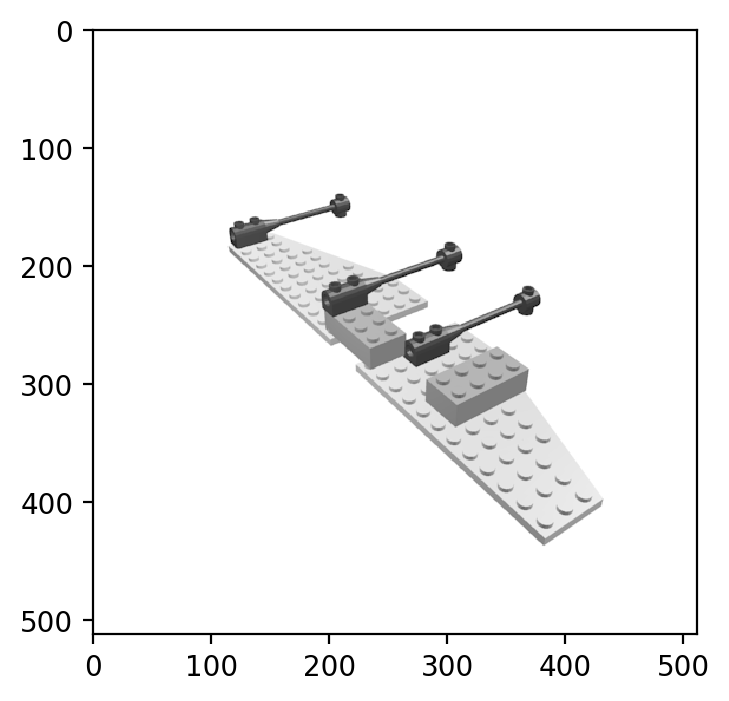

In [17]:
plt.imshow(img)
plt.show()

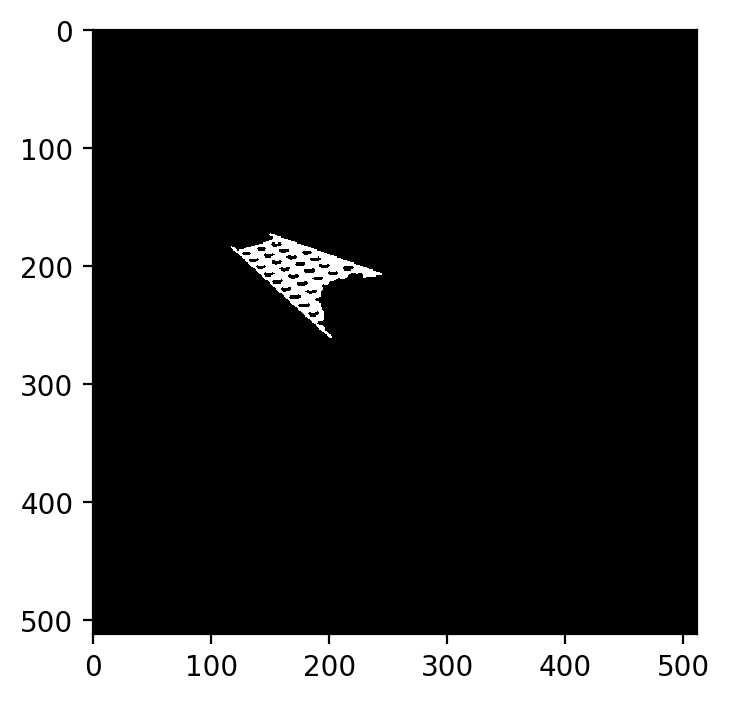

0.9977851
0.99705446
0.9977851
0.99705446
0.99705446
0.99999994
0.99705446
0.99705446
0.99705446
0.9899495
[-8 -8]
[(186, 240), (178, 232), (170, 225), (184, 221), (163, 219), (176, 214), (156, 212), (190, 209), (169, 208), (148, 206), (203, 205), (183, 203), (162, 202), (215, 201), (141, 200), (195, 199), (175, 197), (155, 196), (135, 194), (188, 193), (167, 192), (148, 190), (129, 189), (180, 188), (161, 186), (142, 185), (154, 181)]


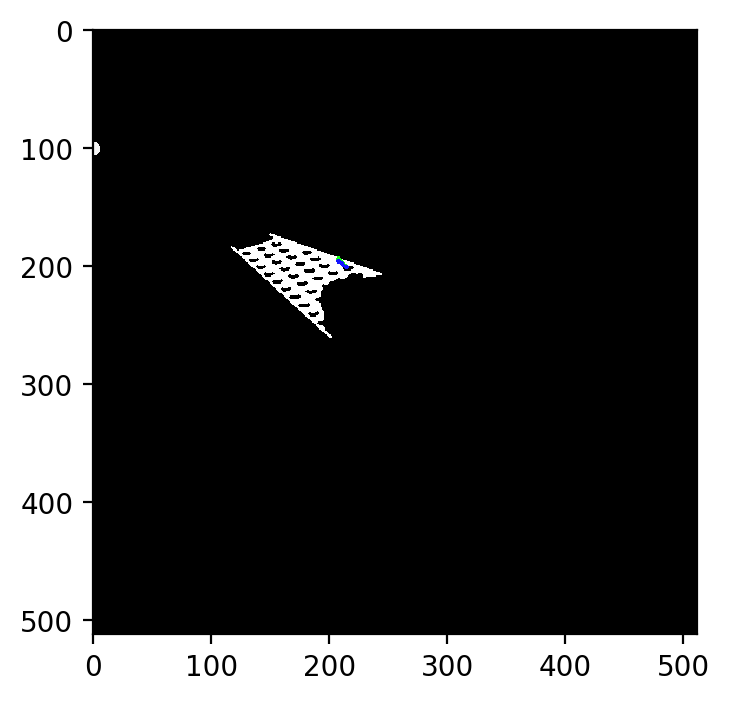

lol
0.93749154
0.9090649
0.95885223
0.93140066
0.9099077
0.94711405


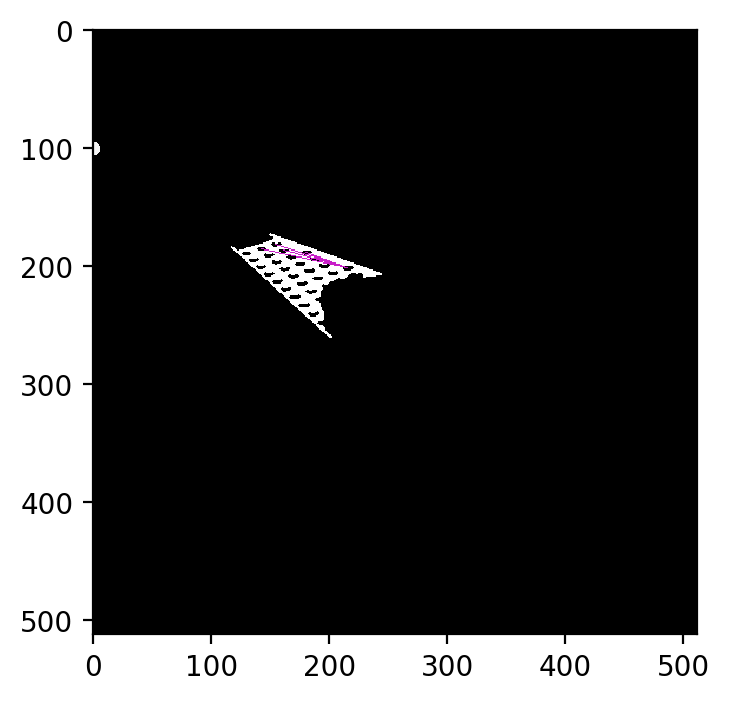

In [18]:
wingimg = cvu.getComboMask(img, data, "WingL", show=False)
wingstuds,locs0 = cvu.getStuddedSurface(cv2.cvtColor(wingimg, cv2.COLOR_BGR2GRAY),show=True)

cv2.circle(wingstuds, (0,100), 3, (244,0,0), 3)

#cur0 = locs0[12]
#corner0 = gu.getNearest(cur0,locs0)[1:3]
#rgb = cv2.cvtColor(wingstuds.astype(np.dtype("float32")), cv2.COLOR_GRAY2RGB)

'''
cv2.circle(rgb, (180, 188),3, (0,20,230), 2)
cv2.circle(rgb, (188, 193),3, (100,0,230), 2)
cv2.circle(rgb, (175, 197),3, (100,230,20), 2)
'''

#cv2.circle(rgb, tuple(cur0),3, (0,20,230), 2)
#cv2.circle(rgb, tuple(corner0[0]),3, (100,0,230), 2)
#cv2.circle(rgb, tuple(corner0[1]),3, (100,230,20), 2)


#plt.imshow(rgb/255)
#plt.show()


#loc0,corner0 = gu.findCorner(locs0)

#_,_ = gu.getCornerLines(loc0, corner0, locs0, wingstuds, show=False)
#print(loc0)
#print(corner0)
#l,g=gu.getCornerLines(loc0, corner0, locs0, wingstuds,show=True)
#gu.getMostCommonVec(wingstuds,locs0)
#gu.getExtremes(wingstuds,locs0,show=True)

cur = locs0[13]
s,v = gu.getBasis(locs0)

print(s)
print(locs0)
gu.getCornerLines(cur, [cur + s, cur + v], locs0, wingstuds, show=True)
l = gu.getAllOnBasis(cur,s,v,locs0,img=wingstuds,show=True)

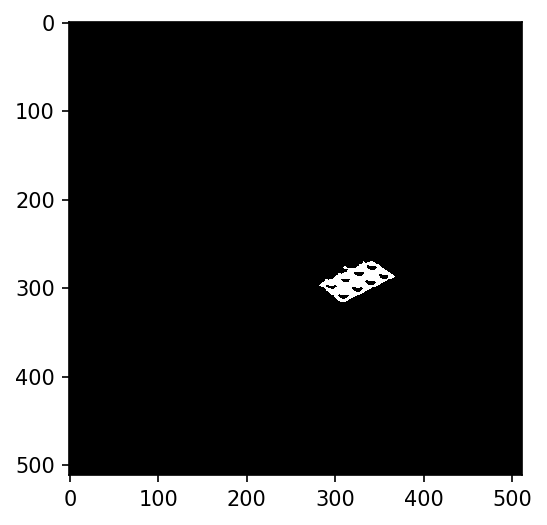

0.4186082
[-13 -11]
[15 -7]


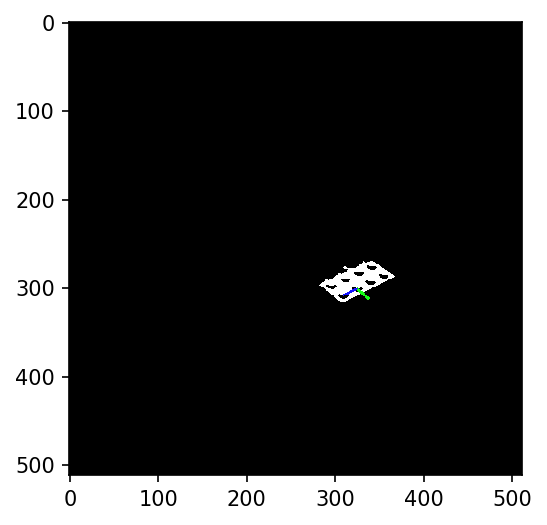

0.9996349
lol
0.99999994
0.99663925
0.9996349


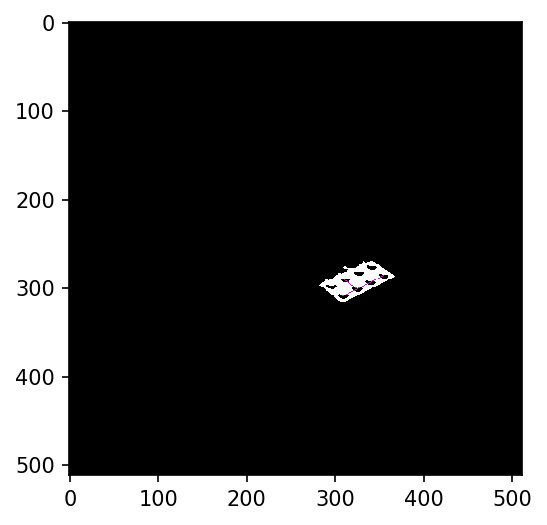

In [12]:
brickimg = cvu.getComboMask(img, data, "Brick.002", show=False)
brickstuds,locs = cvu.getStuddedSurface(cv2.cvtColor(brickimg, cv2.COLOR_BGR2GRAY),show=True)
#cur = locs[1]
#corner = gu.getNearest(cur,locs)[1:3]
#loc,corner = gu.findCorner(locs)
#print(loc)
#l,h=gu.getCornerLines(cur, corner, locs, brickstuds,show=True)
#gu.getMostCommonVec(brickstuds,locs)
#gu.getExtremes(brickstuds, locs,show=True, num=4)

cur = locs[1]
s,v = gu.getBasis(locs)
print(s)
print(v)
v = v * -1
s = s * -1
gu.getCornerLines(cur, [cur + s, cur + v], locs, brickstuds, show=True)
l = gu.getAllOnBasis(cur,s,v,locs,img=brickstuds,show=True)

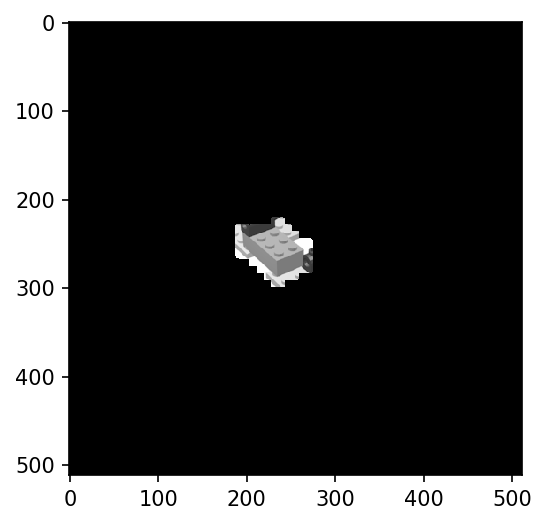

[(237, 263), (252, 256), (226, 254), (241, 248), (217, 245), (232, 239)]
[17, -11]
[-11  -9]


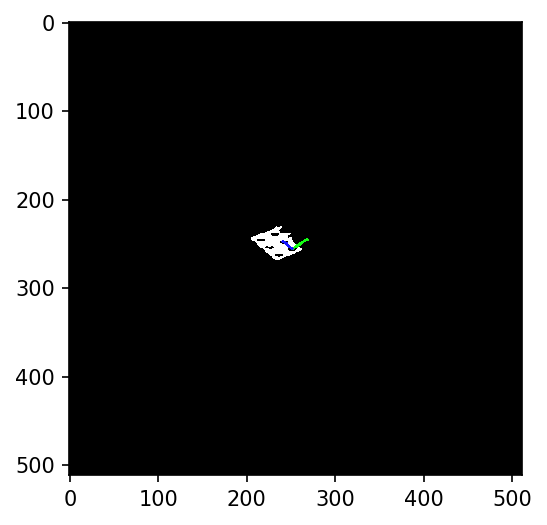

0.99053735
lol
0.9983797
0.9282119
0.9998239


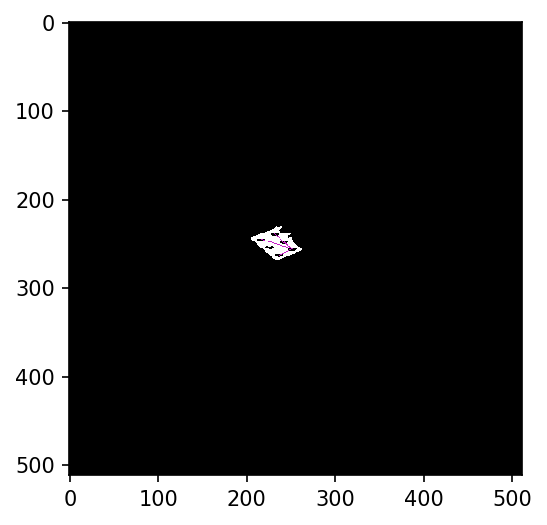

In [9]:
brickimg2 = cvu.getComboMask(img, data, "Brick.001", show=True)
brickstuds2,locs1 = cvu.getStuddedSurface(cv2.cvtColor(brickimg2, cv2.COLOR_BGR2GRAY),show=False)

'''print(locs1)
cur1 = locs1[0]
corner1 = gu.getNearest(cur1,locs1)[1:3]

print(cur1)
print(corner1)

rgb = cv2.cvtColor(brickstuds2.astype(np.dtype("float32")), cv2.COLOR_GRAY2RGB)


cv2.circle(rgb, tuple(cur1),3, (0,20,230), 2)
cv2.circle(rgb, tuple(corner1[0]),3, (100,0,230), 2)
cv2.circle(rgb, tuple(corner1[1]),3, (100,230,20), 2)

plt.imshow(rgb/255)
plt.show()
'''


#loc1,corner1 = gu.findCorner(locs1)
#l=gu.getCornerLines(loc1, corner1, locs1, brickstuds2, show=True)

#gu.getMostCommonVec(brickstuds2, locs1)
#gu.getExtremes(brickstuds2,locs1, show=True, num=4)
cur = np.asarray(locs1[1])
#s,v = gu.getBasis(locs1)
s=[ 17, -11]
print(locs1)
v= gu.getMostCommonVec(locs1)[0]
print(s)
print(v)
gu.getCornerLines(cur, [cur + s, cur + v], locs1, brickstuds2, show=True)
l = gu.getAllOnBasis(cur,s,v,locs1,img=brickstuds2,show=True)